## LINEAR REGRESSION WITH MATHEMATICAL MODEL

In [82]:
import matplotlib.pyplot as plt
import numpy as np
#import sklearn as sk
import random

In [83]:
x=np.arange(0,100,1).reshape(100,1)
noise=np.random.randn(100,1).reshape(100,1)
#liste


In [84]:
b=np.ones(100).reshape(100,1)
#noise

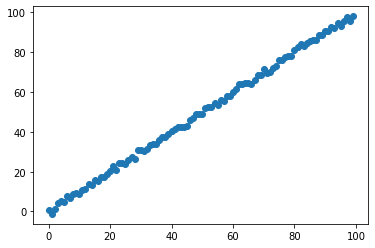

In [85]:
X=np.concatenate((x,b),axis=1)
y=x+noise
theta=np.ones([2,1])
plt.scatter(x,y)

In [86]:
def f(X, theta):
    return X.dot(theta)
 
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((f(X, theta) - y)**2)
 
def grad(X, y, theta):
    m = len(y)
    return np.dot(X.T,f(X, theta) - y)/m
 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost = []
     
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) 
        cost.append(cost_function(X, y, theta))
         
    return theta, cost

In [88]:
theta_final=gradient_descent(X,y,theta,learning_rate=0.0001,n_iterations=1000)[0]

In [89]:
cost_h=gradient_descent(X,y,theta,learning_rate=0.0001,n_iterations=1000)[1]

In [91]:
predictions = f(X, theta_final)

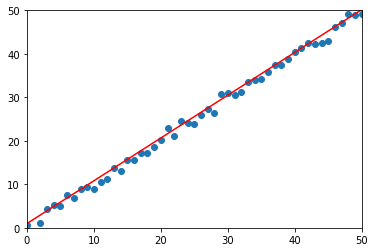

In [92]:
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
ax = plt.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
plt.show()

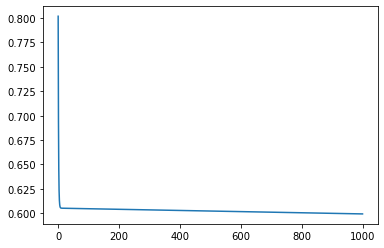

In [93]:
plt.plot(range(1000), cost_h)
plt.show()

## LINEAR REGRESSION WITH SKLEARN

In [94]:
import pandas as pd
df=pd.read_csv("Rent.csv")

In [95]:
df.describe()

,loyer,surface
count,545.000000,545.000000
mean,2307.502752,49.579817
std,2201.364353,50.716462
min,488.000000,1.000000
25%,1255.000000,16.000000
50%,1795.000000,37.000000
75%,2600.000000,68.000000
max,25000.000000,415.000000


In [96]:
df.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,3
4,2545,7


In [97]:
df.isna().sum() #perfect !!

loyer      0
surface    0
dtype: int64

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df['loyer']
Y=df['surface']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5)
reg = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)

In [99]:
preds = reg.predict(np.array(x_test).reshape(-1,1))

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, preds))

Coefficients: 
 [0.02100348]
Mean squared error: 2313.78
Coefficient of determination: -0.22


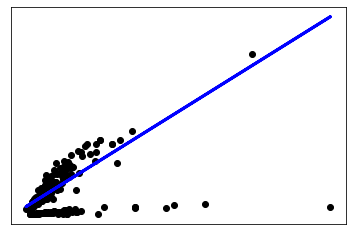

In [101]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, preds, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [102]:
# try to drop higher value
df_new=df.loc[df.loyer <= 5000]
df_new

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,3
4,2545,7
...,...,...
540,1490,48
541,2020,58
542,2050,7
543,1220,42


In [103]:
X_new=df_new['loyer']
Y_new=df_new['surface']
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new, test_size = 0.5)
reg_new = LinearRegression().fit(np.array(x_train_new).reshape(-1,1), y_train_new)

In [104]:
preds_new = reg.predict(np.array(x_test_new).reshape(-1,1))

In [105]:
# The coefficients
print("Coefficients: \n", reg_new.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_new, preds_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_new, preds_new))

Coefficients: 
 [0.02408826]
Mean squared error: 706.89
Coefficient of determination: 0.41


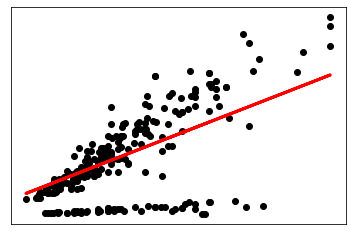

In [106]:
plt.scatter(x_test_new, y_test_new, color="black")
plt.plot(x_test_new, preds_new, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [107]:
reg_new.predict(np.array([[1400, 1550]]).reshape(-1,1)) #only woeking from X to y, dont know 
                                                        #how to make it on the reverse side

array([30.5762951 , 34.18953378])

In [108]:
i=1
list_pred=[]
for i in range(100):
    p=reg_new.predict(np.array([[1400+i, 1500]]).reshape(-1,1))
    list_pred.append(p)
    
for i in range(len(list_pred)):
    if((list_pred[i][0]<=32.01).any() and (list_pred[i][0]>=31.99).any()):
       print("According to the model, for 35 m², the price is:",1400+i,"€ \n")
        
#list_pred

According to the model, for 35 m², the price is: 1459 € 



## K-NN algorithm

In [109]:
from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

In [110]:
mnist.target.shape

(70000,)

In [116]:
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

In [117]:
xtrain_knn, xtest_knn, ytrain_knn, ytest_knn = train_test_split(data, target, train_size=0.8)

In [118]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_knn, ytrain_knn)

KNeighborsClassifier(n_neighbors=3)

In [119]:
error = 1 - knn.score(xtest_knn, ytest_knn)
print('Error: %f' % error*100"%\n")

Error: 0.072000


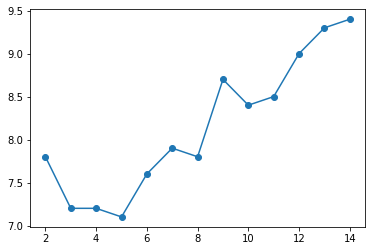

In [120]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain_knn, ytrain_knn).score(xtest_knn, ytest_knn)))
plt.plot(range(2,15), errors, 'o-')
plt.title("Error depending on classifier")
plt.show()

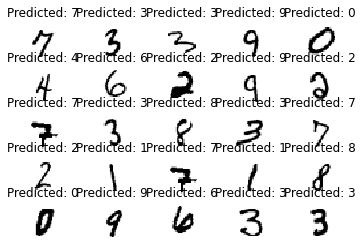

In [122]:
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain_knn, ytrain_knn)

predicted = knn.predict(xtest_knn)

images = xtest_knn.reshape((-1, 28, 28))

select = np.random.randint(images.shape[0], size=25)


fig,ax = plt.subplots(5,5)

for index, value in enumerate(select):
    plt.subplot(5,5,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

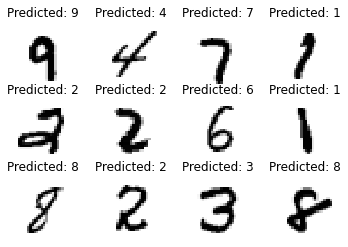

In [124]:

misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]


select = np.random.randint(misclass_images.shape[0], size=12)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()

In [135]:
from sklearn import metrics
print("Accuracy of our KNN ",round(metrics.accuracy_score(ytest_knn, predicted)*100,2),"%")

Accuracy of our KNN  92.8 %
